# 2022 NZMSA Data Science Submission.

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [70]:
dataset = pd.read_csv("weather-data.csv", parse_dates=["valid"], index_col = "valid")
dataset.head() # Show the first five results.

,station,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
valid,,,,,,,
2015-01-01 00:00:00,NZAA,21.0,11.0,52.77,15.0,NaN,NaN
2015-01-01 00:30:00,NZAA,21.0,10.0,49.37,16.0,NaN,NaN
2015-01-01 01:00:00,NZAA,21.0,12.0,56.38,16.0,NaN,NaN
2015-01-01 01:30:00,NZAA,21.0,13.0,60.21,16.0,NaN,NaN
2015-01-01 02:00:00,NZAA,21.0,12.0,56.38,16.0,NaN,NaN


In [73]:
## Numerical analysis
# count : Count number of non-NA/null observations.
# mean  : Mean of the values.
# std   : Standard deviation of the observations
# min   : Minimum of the values in the dataset
# max   : Maximum of the values in the dataset
dataset.describe()

,tmpc,dwpc,relh,sknt,gust
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000
mean,15.811503,12.115772,79.782307,8.919029,30.962594
std,4.235197,3.738005,12.562199,5.348379,6.319510
min,2.000000,-2.000000,29.230000,0.000000,13.000000
25%,13.000000,9.000000,71.450000,5.000000,27.000000
50%,16.000000,12.000000,81.990000,8.000000,31.000000
75%,19.000000,15.000000,88.180000,12.000000,35.000000
max,29.000000,23.000000,100.000000,42.000000,56.000000


From the above table it is clear count for peak_wind_drct is 0, meaning that there is no data for this column and it should be removed from the analysis.

In [72]:
## Remove peak_wind_drct from the dataset as it has no values
try:
    dataset.pop('peak_wind_drct')
except:
    print("peak_wind_drct has already been removed")

dataset.describe()

peak_wind_drct has already been removed


,tmpc,dwpc,relh,sknt,gust
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000
mean,15.811503,12.115772,79.782307,8.919029,30.962594
std,4.235197,3.738005,12.562199,5.348379,6.319510
min,2.000000,-2.000000,29.230000,0.000000,13.000000
25%,13.000000,9.000000,71.450000,5.000000,27.000000
50%,16.000000,12.000000,81.990000,8.000000,31.000000
75%,19.000000,15.000000,88.180000,12.000000,35.000000
max,29.000000,23.000000,100.000000,42.000000,56.000000


<AxesSubplot:>

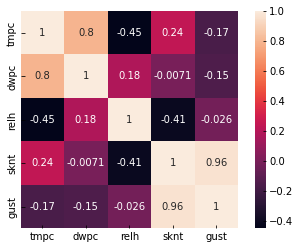

In [30]:
## Graphical Analysis
# calculate correlation matrix
corrMatrix = dataset.corr()

# plot correlation heatmap
sns.heatmap(corrMatrix, annot=True, square=True)

In [48]:
## Initial size of the data is too large
#  Therefore, reduce dataset to semi-monthly averages
redData = dataset.resample('SM').mean()
redData.describe()

,tmpc,dwpc,relh,sknt,gust
count,144.000000,144.000000,144.000000,144.000000,131.000000
mean,15.821355,12.127368,79.794383,8.908647,28.347488
std,3.341170,2.798293,4.364735,1.882173,4.831918
min,10.265512,7.206944,70.161111,5.319484,15.000000
25%,12.592478,9.681109,76.783189,7.446133,26.000000
50%,15.823883,11.961564,80.134913,8.550130,28.500000
75%,18.768687,14.532761,83.060456,10.347005,31.277174
max,22.557895,18.759211,88.397763,14.309917,41.000000


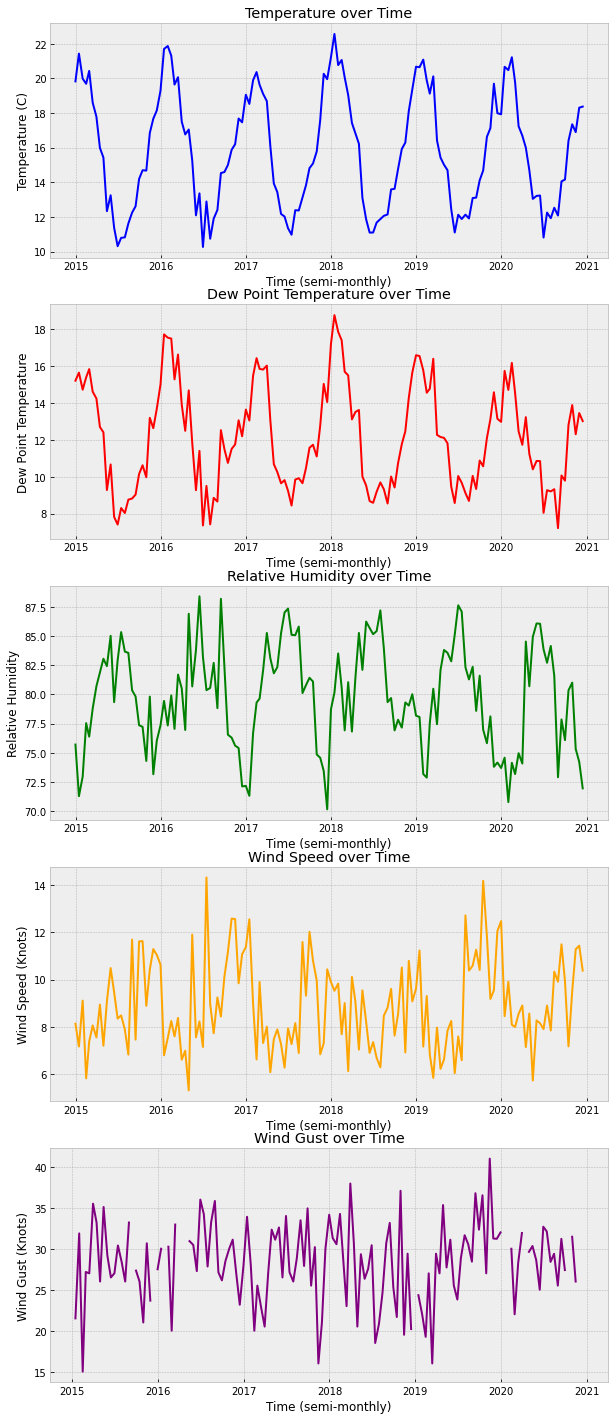

In [56]:
## Plot the data over time
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

# Temperature
ax1.plot(redData.index, redData["tmpc"], color="blue")
ax1.set_title("Temperature over Time")
ax1.set_xlabel("Time (semi-monthly)")
ax1.set_ylabel("Temperature (C)")

# Dew point temperature
ax2.plot(redData.index, redData["dwpc"], color="red")
ax2.set_title("Dew Point Temperature over Time")
ax2.set_xlabel("Time (semi-monthly)")
ax2.set_ylabel("Dew Point Temperature")

# Relative humidity
ax3.plot(redData.index, redData["relh"], color="green")
ax3.set_title("Relative Humidity over Time")
ax3.set_xlabel("Time (semi-monthly)")
ax3.set_ylabel("Relative Humidity")

# Wind speed
ax4.plot(redData.index, redData["sknt"], color="orange")
ax4.set_title("Wind Speed over Time")
ax4.set_xlabel("Time (semi-monthly)")
ax4.set_ylabel("Wind Speed (Knots)")

# Wind gusts
ax5.plot(redData.index, redData["gust"], color="purple")
ax5.set_title("Wind Gust over Time")
ax5.set_xlabel("Time (semi-monthly)")
ax5.set_ylabel("Wind Gust (Knots)")

fig.set_size_inches(10,25)

# uncomment code below if figure not being displayed in your machine
# fig.show()

# Comments
Considering that we are analysing data over the span of 6 years and the type of data we are interested in, we can safely presume to use time series analysis.

The temperature, dew point temperature and relative humidity all seem to be fairly seasonal, with the behaviour of the relative humidity acting inversely to the two temperature data sets. The two temperature graphs seem very closely correlated which is no surprise.

The data for wind speed and gusts is a bit more jagged and unclear for interpretation. Smoothing out these graphs by getting monthly averages may provide more insight:

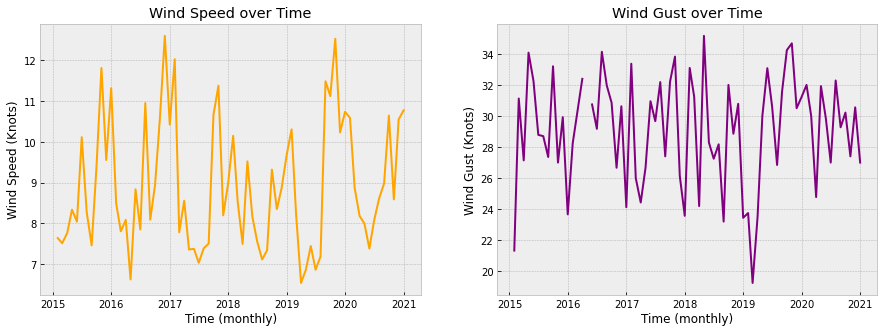

In [62]:
# Resampling to monthly averages
redData2 = dataset.resample('M').mean()

fig, (ax6, ax7) = plt.subplots(nrows=1, ncols=2, squeeze=True)

# Wind speed
ax6.plot(redData2.index, redData2["sknt"], color="orange")
ax6.set_title("Wind Speed over Time")
ax6.set_xlabel("Time (monthly)")
ax6.set_ylabel("Wind Speed (Knots)")

# Wind gusts
ax7.plot(redData2.index, redData2["gust"], color="purple")
ax7.set_title("Wind Gust over Time")
ax7.set_xlabel("Time (monthly)")
ax7.set_ylabel("Wind Gust (Knots)")

fig.set_size_inches(15,5)

# Comments - continued
Now that the data is slightly smoother the seasonal behaviour of wind speed and gust is more apparent.

Wind speed seems to peak around the start of each new year and dips during the middle of the year lining up with the behaviour observed in the temperature graphs.

Wind gust on the other hand seems to demonstrate an inverse behaviour to wind speed although not quite having extreme crests and troughs as wind speed.

# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.

In [ ]:
## Extra code that might be useful

# Display the means of all columns
print(dataset.mean(axis=0))

# Display the mean of a specified column
print(dataset['tmpc'].mean())